数据集：http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant  
参考：http://www.cnblogs.com/pinard/p/6016029.html
## 获取数据，定义问题

In [6]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv('data/ccpp.csv')

In [36]:
data.head(10)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
5,13.97,39.16,1016.05,84.60,470.96
6,22.10,71.29,1008.20,75.38,442.35
7,14.47,41.76,1021.98,78.41,464.00
8,31.25,69.51,1010.25,36.83,428.77
9,6.77,38.18,1017.80,81.13,484.31


In [15]:
len(data),data.shape

(9568, (9568, 5))

In [10]:
data.isnull().sum(), len(data)

(AT    0
 V     0
 AP    0
 RH    0
 PE    0
 dtype: int64, 9568)

   里面是一个循环发电场的数据，共有9568个样本数据，每个数据有5列，分别是:AT（温度）, V（压力）, AP（湿度）, RH（压强）, PE（输出电力)。我们不用纠结于每项具体的意思。  
   我们的问题是得到一个线性的关系，对应PE是样本输出，而AT/V/AP/RH这4个是样本特征， 机器学习的目的就是得到一个线性回归模型，即:

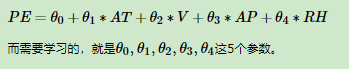

属性信息：



特征由小时平均环境变量组成

-温度(T)在1.81℃和37.11℃范围内，

-环境压力(AP)在992.89-1033.30毫巴范围内，

-相对湿度（RH）在25.56%至100.16%之间

-排气真空(V)在25.36-81.56厘米汞柱

-每小时净电能输出(EP)420.26-495.76兆瓦

平均值取自工厂周围每秒记录环境变量的各种传感器。这些变量是在没有标准化的情况下给出的。

## 准备运行算法的数据
现在我们开始准备样本特征X，我们用AT， V，AP和RH这4个列作为样本特征。

In [16]:
X = data[['AT', 'V', 'AP', 'RH']]
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


接着我们准备样本输出y， 我们用PE作为样本输出。

In [17]:
y = data[['PE']]
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## 划分训练集和测试集
　　　　我们把X和y的样本组合划分成两部分，一部分是训练集，一部分是测试集，代码如下：

In [18]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from 

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)


## 运行scikit-learn的线性模型
　　　　终于到了临门一脚了，我们可以用scikit-learn的线性模型来拟合我们的问题了。scikit-learn的线性回归算法使用的是最小二乘法来实现的。代码如下：

In [21]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
# from sklearn.linear_model import Lasso,LinearRegression,Ridge,ElasticNet,TheilSenRegressor,HuberRegressor,RANSACRegressor
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
# from sklearn.ensemble import AdaBoostRegressor,ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# import itertools

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

拟合完毕后，我们看看我们的需要的模型系数结果：

In [22]:
print(linreg.intercept_)
print(linreg.coef_)

[447.06297099]
[[-1.97376045 -0.23229086  0.0693515  -0.15806957]]


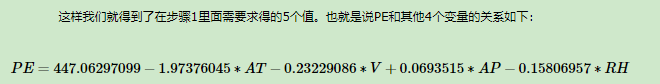
## 模型评价

In [23]:
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 20.080401202073904
RMSE: 4.481116066570236


得到了MSE或者RMSE，如果我们用其他方法得到了不同的系数，需要选择模型时，就用MSE小的时候对应的参数。

比如这次我们用AT， V，AP这3个列作为样本特征。不要RH， 输出仍然是PE。代码如下：

In [25]:
X = data[['AT', 'V', 'AP']]
y = data[['PE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 23.208907470136236
RMSE: 4.817562399194871


可以看出，去掉RH后，模型拟合的没有加上RH的好，MSE变大了。
## 交叉验证
我们可以通过交叉验证来持续优化模型，代码如下，我们采用10折交叉验证，即cross_val_predict中的cv参数为10：

In [27]:
X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=10)
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y, predicted))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE: 20.7955974619431
RMSE: 4.560219014690314


可以看出，采用交叉验证模型的MSE比第6节的大，主要原因是我们这里是对所有折的样本做测试集对应的预测值的MSE，而第6节仅仅对25%的测试集做了MSE。两者的先决条件并不同。

## 画图观察结果
    这里画图真实值和预测值的变化关系，离中间的直线y=x直接越近的点代表预测损失越低。代码如下：



In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from scipy import stats

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


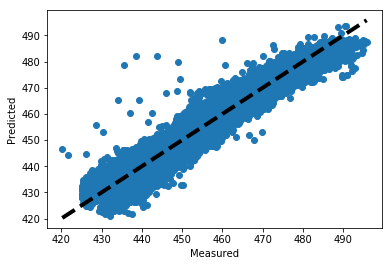

In [30]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

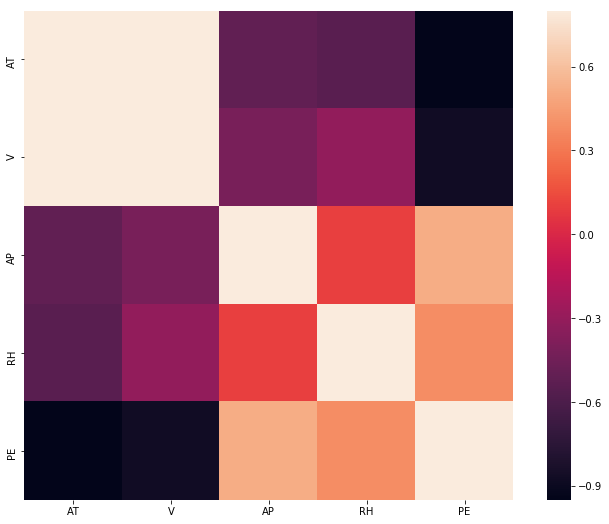

In [31]:
corrmat = data.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, ax=ax)  # square参数保证corrmat为非方阵时，图形整体输出仍为正方形
plt.show()

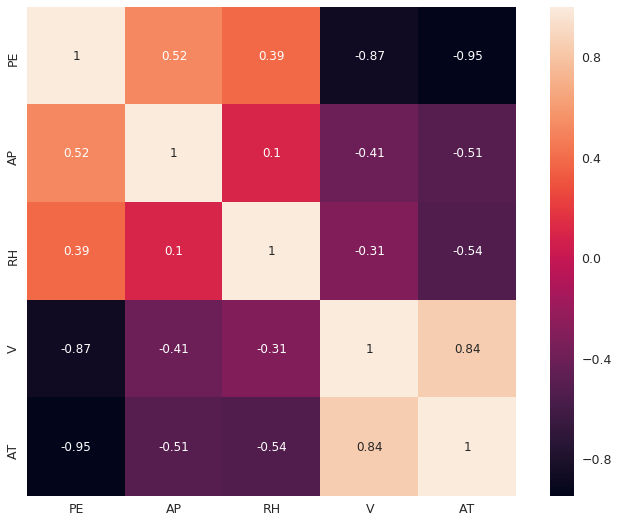

In [35]:
output = 'PE'
k = 5
top5_attr = corrmat.nlargest(k, output).index
top5_mat = corrmat.loc[top5_attr, top5_attr]
fig,ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
sns.heatmap(top5_mat, annot=True, annot_kws={'size':12}, square=True)
# 设置annot使其在小格内显示数字，annot_kws调整数字格式
plt.show()

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


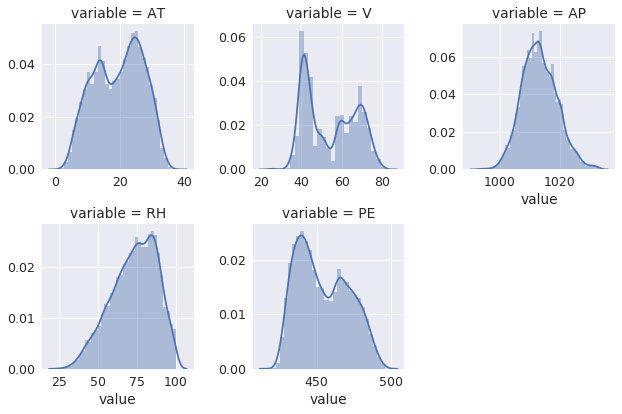

In [37]:
melt_X = pd.melt(data, value_vars=data.columns)
g = sns.FacetGrid(melt_X, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")  # 以melt_X['value']作为数据

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


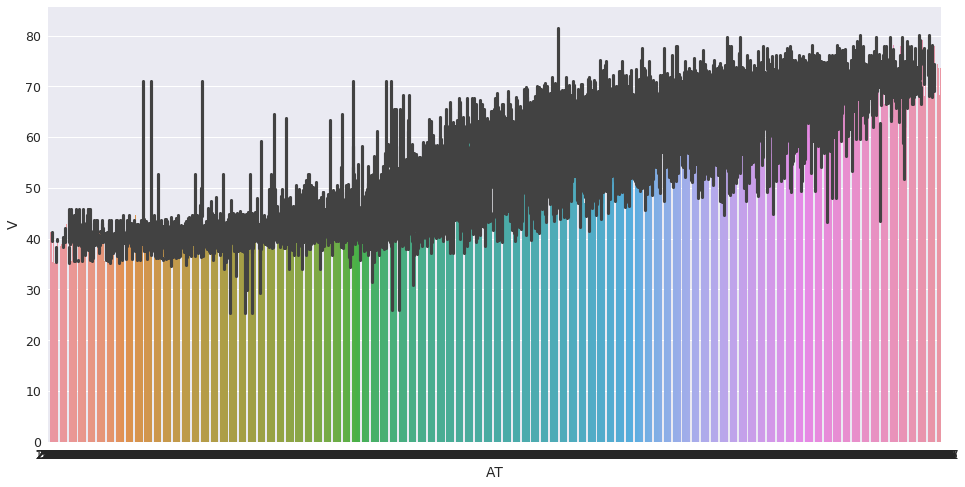

In [38]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x='AT',y='V',data=data)
# ax.set_ylim(0,800000)
# plt.xticks(rotation=90) #x坐标标识旋转90度
plt.show()

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


KeyboardInterrupt: 

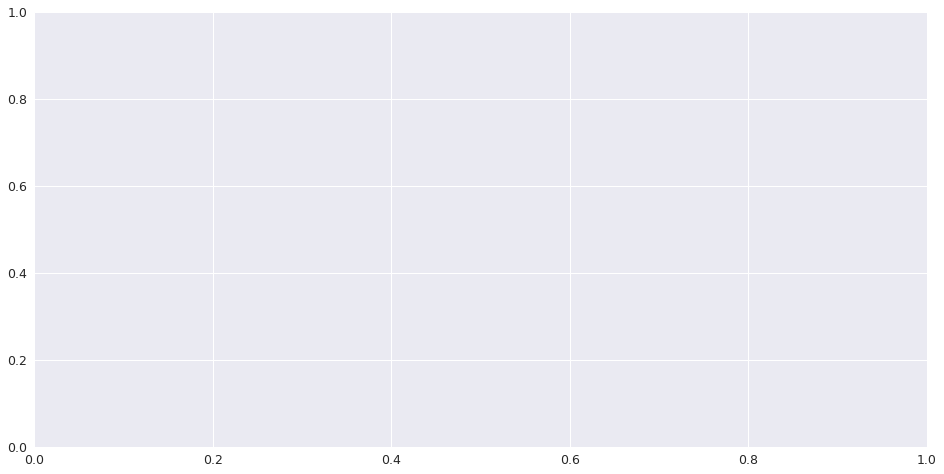

In [39]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x='AT',y='PE',data=data)
# ax.set_ylim(0,800000)
# plt.xticks(rotation=90) #x坐标标识旋转90度
plt.show()

In [6]:
data[['Concrete_compressive_strength','Cement']].groupby(['Cement'],as_index = False).mean()

,Cement,Concrete_compressive_strength
0,102.0,13.747500
1,108.3,14.967500
2,116.0,17.435000
3,122.6,17.787500
4,132.0,33.305000
5,133.0,23.206000
6,133.1,28.940000
7,134.7,13.290000
8,135.0,17.600000
9,135.7,12.855000


Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database. 

Name -- Data Type -- Measurement -- Description  

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable   
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable   
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable   
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable   
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable  
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable   
Fine Aggregate (component 7)	-- quantitative -- kg in a m3 mixture -- Input Variable   
Age -- quantitative -- Day (1~365) -- Input Variable   
Concrete compressive strength -- quantitative -- MPa -- Output Variable  

给出了变量名、变量类型、测量单元和简要说明。混凝土抗压强度是回归问题。这个列表的顺序对应于沿着数据库行的数字的顺序。



名称——数据类型——测量——描述



水泥（组分1）--定量--m3混合物中的千克--输入变量  

高炉渣（组分2）——定量——千克m3混合物——输入变量  

粉煤灰（组分3）——定量——千克m3混合物——输入变量  
  
水（组分4）——定量——m3混合物中的千克——输入变量  

超塑剂（组分5）——定量——m3混合物中的kg——输入变量  

粗集料（组分6）——定量——m3混合物中的kg——输入变量  

细集料（组分7）——定量——m3混合物中的kg——输入变量  

年龄——数量——日期（1~365）——输入变量

混凝土抗压强度——定量——MPa——输出变量

In [7]:
data.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age',
       'Concrete_compressive_strength'],
      dtype='object')

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from scipy import stats

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


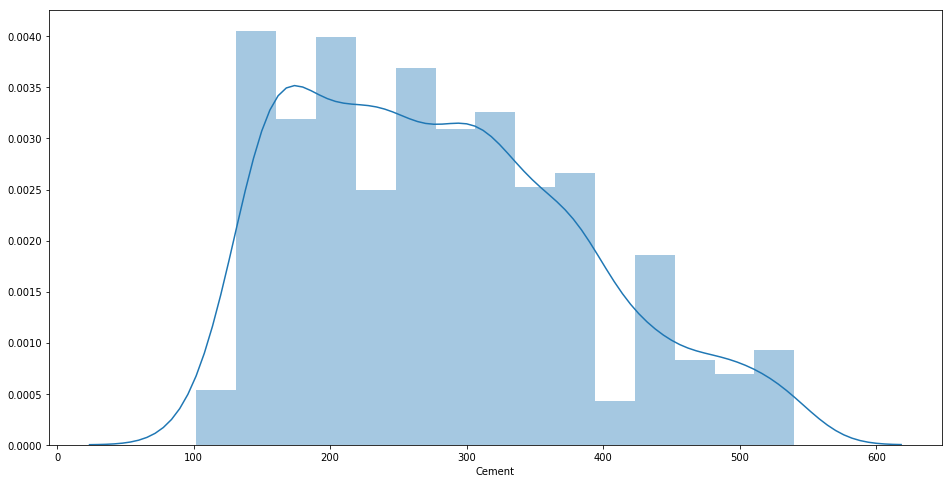

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(data['Cement'])

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


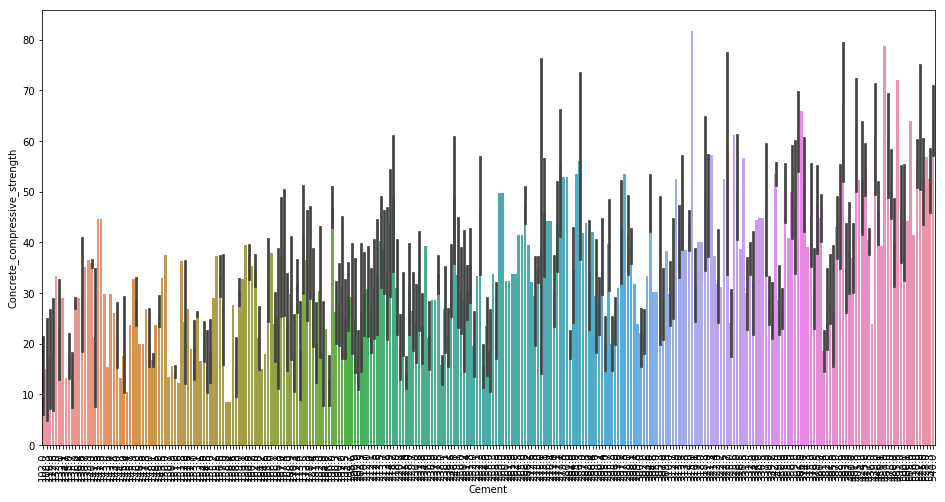

In [10]:
var = 'Cement'
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x=var,y='Concrete_compressive_strength',data=data)
# ax.set_ylim(0,800000)
plt.xticks(rotation=90) #x坐标标识旋转90度
plt.show()

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


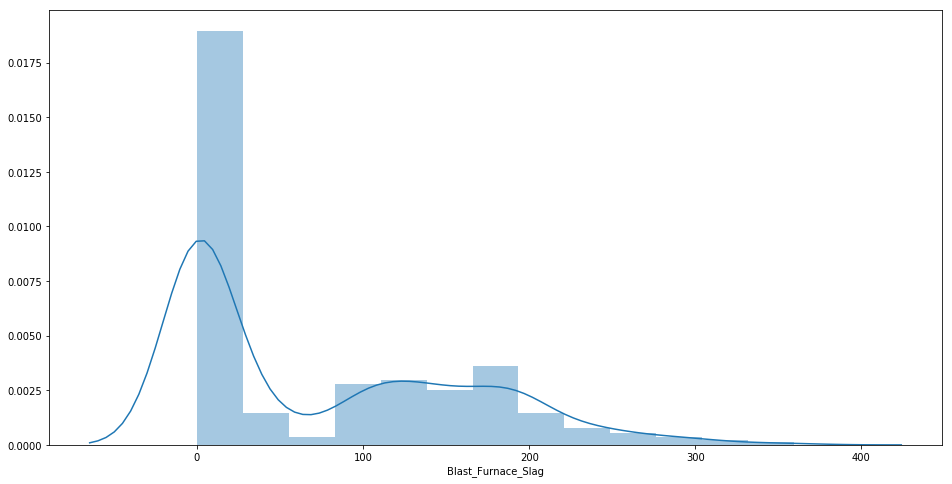

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(data['Blast_Furnace_Slag'])

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


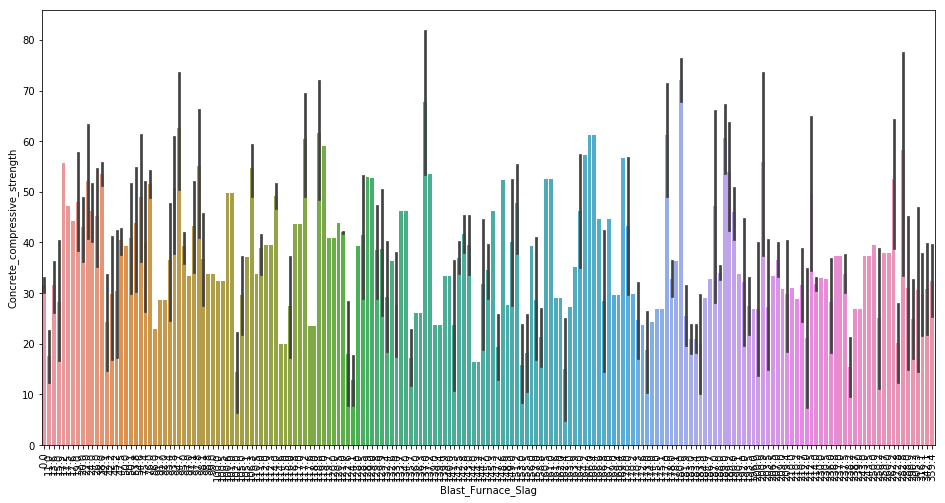

In [12]:
var = 'Blast_Furnace_Slag'
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x=var,y='Concrete_compressive_strength',data=data)
# ax.set_ylim(0,800000)
plt.xticks(rotation=90) #x坐标标识旋转90度
plt.show()

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


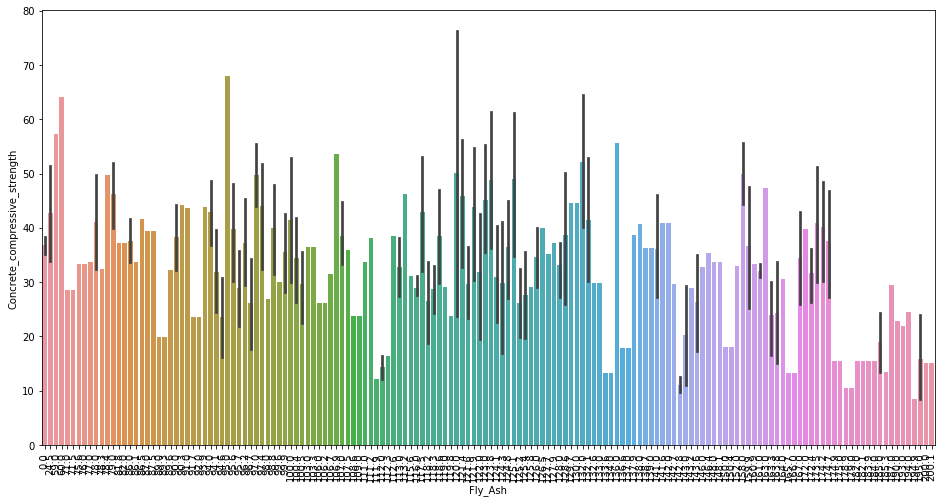

In [13]:
var = 'Fly_Ash'
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x=var,y='Concrete_compressive_strength',data=data)
# ax.set_ylim(0,800000)
plt.xticks(rotation=90) #x坐标标识旋转90度
plt.show()

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


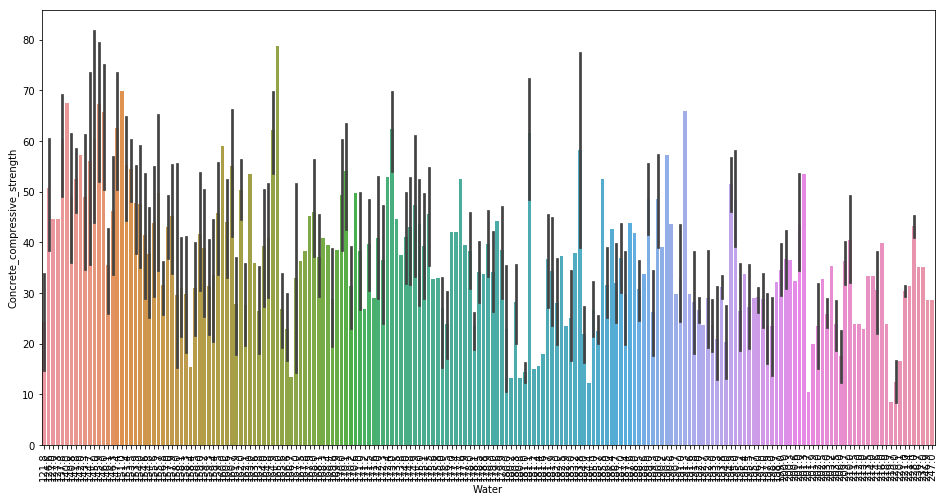

In [14]:
var = 'Water'
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x=var,y='Concrete_compressive_strength',data=data)
# ax.set_ylim(0,800000)
plt.xticks(rotation=90) #x坐标标识旋转90度
plt.show()

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


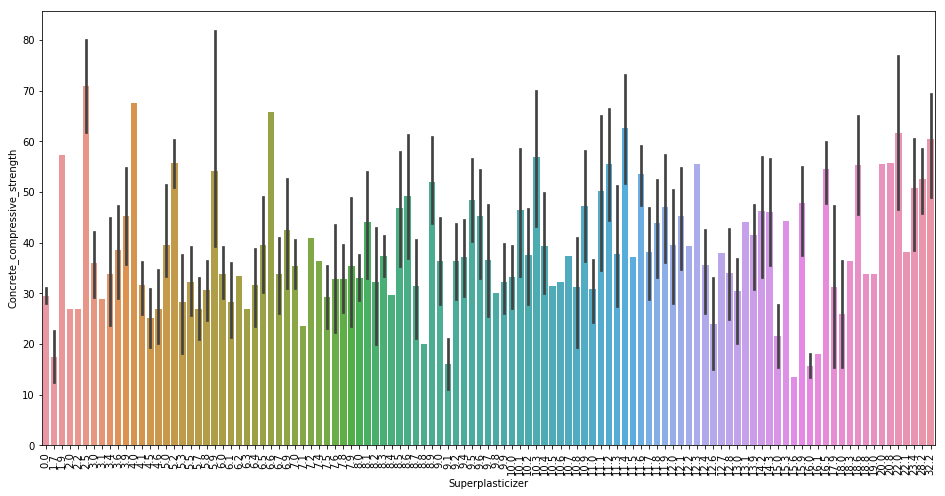

In [15]:
var = 'Superplasticizer'
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x=var,y='Concrete_compressive_strength',data=data)
# ax.set_ylim(0,800000)
plt.xticks(rotation=90) #x坐标标识旋转90度
plt.show()

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


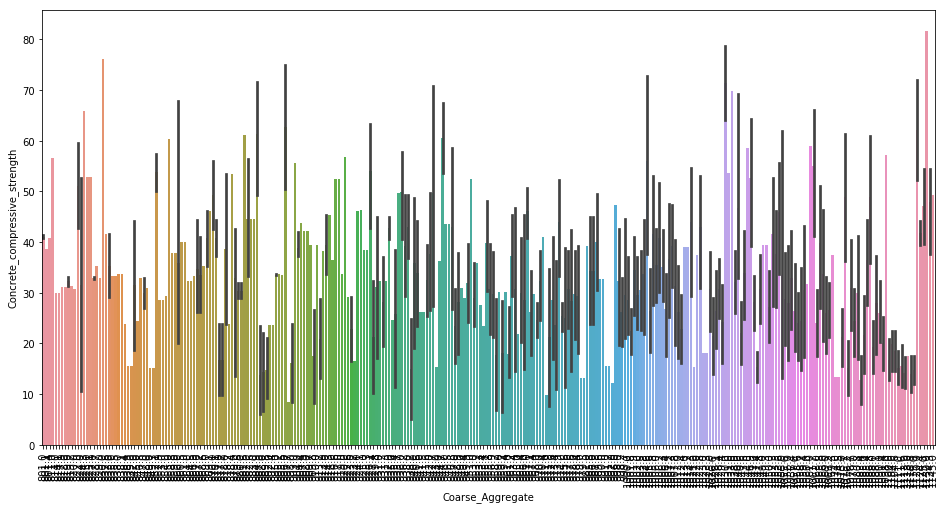

In [16]:
var = 'Coarse_Aggregate'
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x=var,y='Concrete_compressive_strength',data=data)
# ax.set_ylim(0,800000)
plt.xticks(rotation=90) #x坐标标识旋转90度
plt.show()

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


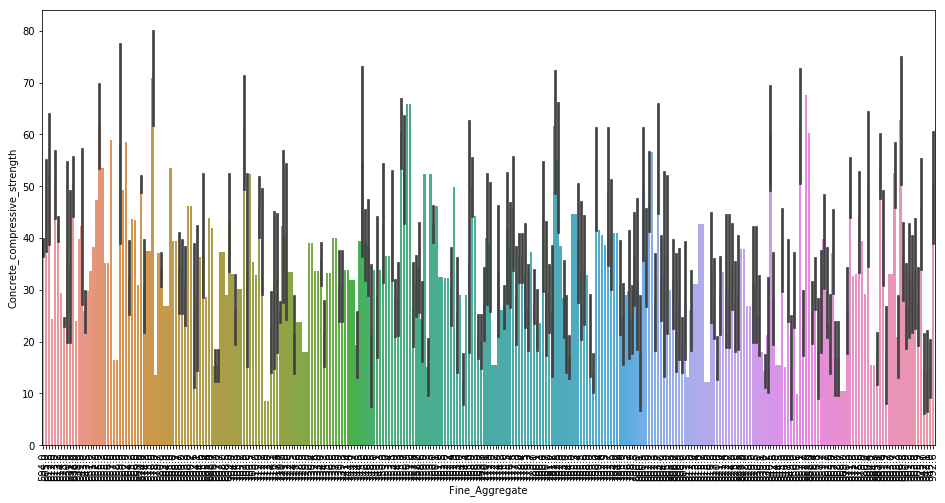

In [17]:
var = 'Fine_Aggregate'
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x=var,y='Concrete_compressive_strength',data=data)
# ax.set_ylim(0,800000)
plt.xticks(rotation=90) #x坐标标识旋转90度
plt.show()

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


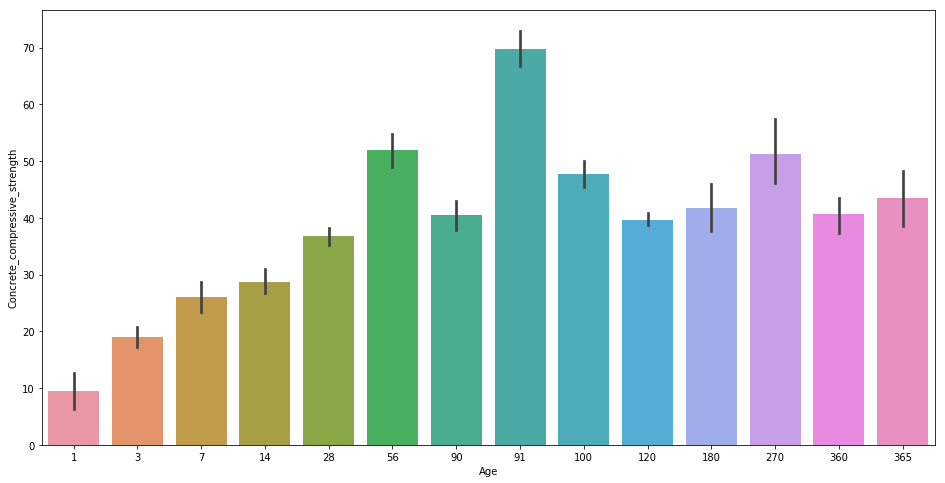

In [18]:
var = 'Age'
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x=var,y='Concrete_compressive_strength',data=data)
# ax.set_ylim(0,800000)
# plt.xticks(rotation=90) #x坐标标识旋转90度
plt.show()

上述操作主要是单个或两个特征的数据分布进行分析，下面我们对各个特征间的关系进行分析：

最简单地，直接获取整个DataFrame数据的协方差矩阵并利用sns.heatmap()进行可视化

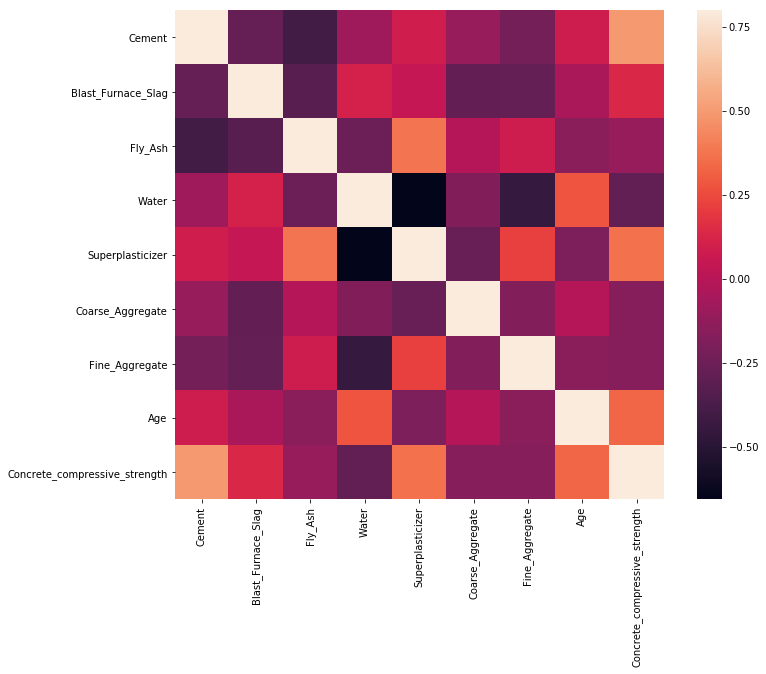

In [19]:
corrmat = data.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, ax=ax)  # square参数保证corrmat为非方阵时，图形整体输出仍为正方形
plt.show()

DataFrame.nlargest(n, columns, keep='first')[source]  
    Return the first n rows ordered by columns in descending order.  
    Return the first n rows with the largest values in columns, in descending order. The columns that are not specified are returned as well, but not used for ordering.  
    This method is equivalent to df.sort_values(columns, ascending=False).head(n), but more performant.

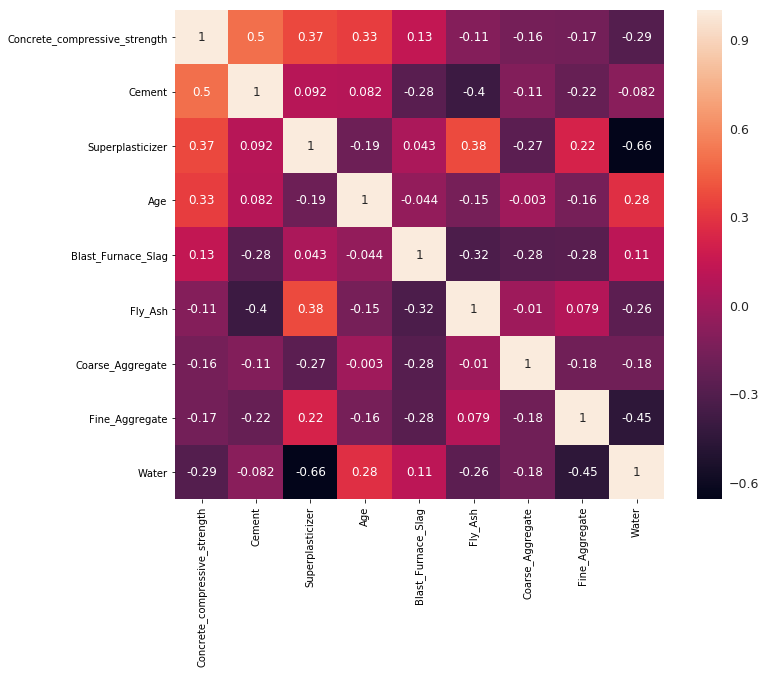

In [20]:
output = 'Concrete_compressive_strength'
k = 9
top9_attr = corrmat.nlargest(k, output).index
top9_mat = corrmat.loc[top9_attr, top9_attr]
fig,ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
sns.heatmap(top9_mat, annot=True, annot_kws={'size':12}, square=True)
# 设置annot使其在小格内显示数字，annot_kws调整数字格式
plt.show()

In [21]:
melt_X = pd.melt(data, value_vars=data.columns)
melt_X.head()

,variable,value
0,Cement,540.0
1,Cement,540.0
2,Cement,332.5
3,Cement,332.5
4,Cement,198.6


In [22]:
melt_X.tail()

,variable,value
9265,Concrete_compressive_strength,44.28
9266,Concrete_compressive_strength,31.18
9267,Concrete_compressive_strength,23.70
9268,Concrete_compressive_strength,32.77
9269,Concrete_compressive_strength,32.40


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


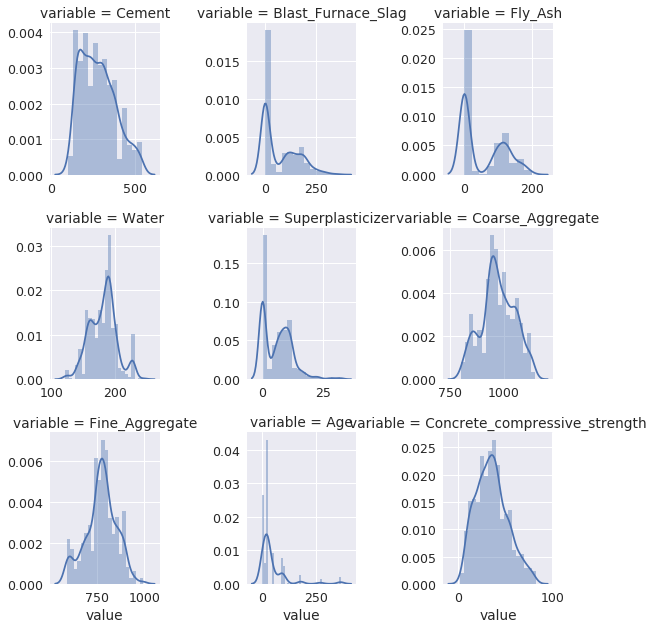

In [23]:
g = sns.FacetGrid(melt_X, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")  # 以melt_X['value']作为数据

In [29]:
max(np.unique(data['Cement']))

540.0

In [24]:
yearmonthsurv = df_data[['year','month','pm2.5']].groupby(['year','month'],as_index=False).mean()
sns.factorplot('month','pm2.5','year', data=df_data
                ,aspect=3,kind='bar')
plt.suptitle('MonthBand,Year vs pm2.5')

NameError: name 'df_data' is not defined